<a href="https://colab.research.google.com/github/merazlab/pytorch/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [0]:
mean_gray = 0.1382
std_dev = 0.3081

transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean_gray,), (std_dev,))])

In [4]:
train_dataset = datasets.MNIST("./data", train=True, transform=transforms, download=True)
test_dataset = datasets.MNIST("./data", train=False, transform=transforms)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
import matplotlib.pyplot as plt


In [6]:
print(type(train_dataset))
# print(train_dataset.shape)

<class 'torchvision.datasets.mnist.MNIST'>


In [7]:
img_sample = train_dataset[4][0].numpy() * std_dev + mean_gray
# print(img_sample)
print(type(img_sample))
print(img_sample.shape)




<class 'numpy.ndarray'>
(1, 28, 28)


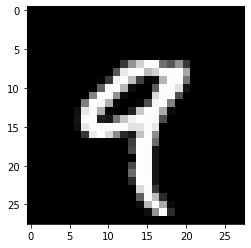

In [8]:
plt.imshow(img_sample.reshape(28, 28), cmap='gray')

In [0]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=200, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=200, shuffle=False)


In [10]:
print(type(train_loader))
print(len(train_loader))

<class 'torch.utils.data.dataloader.DataLoader'>
300


In [0]:
class LNET(nn.Module):
  def __init__(self):
    super(LNET, self).__init__()
    self.cnn1 = nn.Conv2d(1, 8, 3, 1, 1)
    self.bnm1 = nn.BatchNorm2d(8)
    self.relu = nn.ReLU()
    self.maxpool = nn.MaxPool2d(2)
    self.cnn2 = nn.Conv2d(8, 32, 5, 1, 2)
    self.bnm2 = nn.BatchNorm2d(32)
    self.fc1 = nn.Linear(1568, 600)
    self.droupout = nn.Dropout(0.4)
    self.fc2 = nn.Linear(600, 10)

  def forward(self, x):
    out = self.maxpool(self.relu(self.bnm1(self.cnn1(x))))
    out = self.maxpool(self.relu(self.bnm2(self.cnn2(out))))

    out = out.view(-1, 1568)
    
    out = self.fc1(out)
    out = self.relu(out)
    out = self.droupout(out)
    out  = self.fc2(out)
    return out

In [0]:
model = LNET()
if torch.cuda.is_available():
  model = model.cuda()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [13]:
iteration = 0
correct = 0


for i,(inputs,labels) in enumerate (train_loader):

    if torch.cuda.is_available:
        inputs = inputs.cuda()
        labels = labels.cuda()
        
    print("For one iteration, this is what happens:")
    print("Input Shape:",inputs.shape)
    print("Input dtype:",inputs.dtype)
    print("inputs", inputs)

    print("Labels Shape:",labels.shape)
    print("Labels dtype:",labels.dtype)
    print("labels", labels)

    output = model(inputs)
    print("Outputs Shape",output.shape)
    print("Outputs dtype",output.dtype)

    loss = loss_fn(output, labels)
    print(loss)
    print(loss.item())


    _, predicted = torch.max(output, 1)
    print("Predicted Shape",predicted.shape)
    print("Predicted dtype",predicted.dtype)

    print("Predicted Tensor:")
    print(predicted)
    correct += (predicted == labels).sum()

    break

For one iteration, this is what happens:
Input Shape: torch.Size([200, 1, 28, 28])
Input dtype: torch.float32
inputs tensor([[[[-0.4486, -0.4486, -0.4486,  ..., -0.4486, -0.4486, -0.4486],
          [-0.4486, -0.4486, -0.4486,  ..., -0.4486, -0.4486, -0.4486],
          [-0.4486, -0.4486, -0.4486,  ..., -0.4486, -0.4486, -0.4486],
          ...,
          [-0.4486, -0.4486, -0.4486,  ..., -0.4486, -0.4486, -0.4486],
          [-0.4486, -0.4486, -0.4486,  ..., -0.4486, -0.4486, -0.4486],
          [-0.4486, -0.4486, -0.4486,  ..., -0.4486, -0.4486, -0.4486]]],


        [[[-0.4486, -0.4486, -0.4486,  ..., -0.4486, -0.4486, -0.4486],
          [-0.4486, -0.4486, -0.4486,  ..., -0.4486, -0.4486, -0.4486],
          [-0.4486, -0.4486, -0.4486,  ..., -0.4486, -0.4486, -0.4486],
          ...,
          [-0.4486, -0.4486, -0.4486,  ..., -0.4486, -0.4486, -0.4486],
          [-0.4486, -0.4486, -0.4486,  ..., -0.4486, -0.4486, -0.4486],
          [-0.4486, -0.4486, -0.4486,  ..., -0.4486, -0.4

In [14]:
num_epochs = 5
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
  iteration = 0
  correct = 0
  inter_loss = 0

  #model train Start
  model.train()

  for i, (inputs, labels) in enumerate(train_loader):
    if torch.cuda.is_available():
      inputs = inputs.cuda()
      labels = labels.cuda()

    outputs = model(inputs)
    loss = loss_fn(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # iter_loss += loss.item()
    _, predicted = torch.max(outputs, 1)
    correct += (predicted == labels).sum()
    iteration += 1

  train_accuracy.append((100*correct / len(train_dataset)))
  print('Epoch {}/{}, Training Accuracy: {:.3f}'.format(epoch+1, num_epochs, train_accuracy[-1]))

#model test Start
  iteration = 0
  correct = 0
  test_accuracy = []

  model.eval()

  for i, (inputs, labels) in enumerate(test_loader):
    if torch.cuda.is_available():
      inputs = inputs.cuda()
      labels = labels.cuda()

    outputs = model(inputs)
    loss = loss_fn(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # iter_loss += loss.item()
    _, predicted = torch.max(outputs, 1)
    correct += (predicted == labels).sum()
    iteration += 1

  test_accuracy.append((100*correct / len(test_dataset)))
  print('Epoch {}/{}, Test Accuracy: {:.3f}'.format(epoch+1, num_epochs, test_accuracy[-1]))

print("training done")

Epoch 1/5, Training Accuracy: 93.000
Epoch 1/5, Test Accuracy: 97.000
Epoch 2/5, Training Accuracy: 97.000
Epoch 2/5, Test Accuracy: 98.000
Epoch 3/5, Training Accuracy: 98.000
Epoch 3/5, Test Accuracy: 99.000
Epoch 4/5, Training Accuracy: 98.000
Epoch 4/5, Test Accuracy: 99.000
Epoch 5/5, Training Accuracy: 98.000
Epoch 5/5, Test Accuracy: 99.000
training done


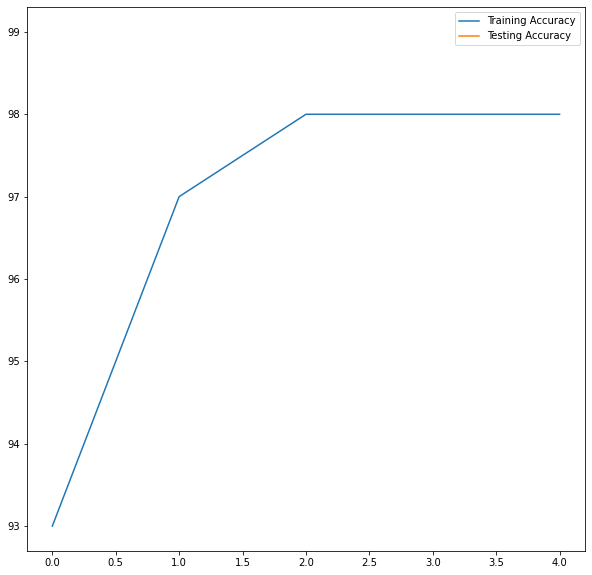

In [15]:
# Accuracy
f = plt.figure(figsize=(10, 10))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Testing Accuracy')
plt.legend()
plt.show()

In [17]:
print(model)

LNET(
  (cnn1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnm1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(8, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bnm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1568, out_features=600, bias=True)
  (droupout): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=600, out_features=10, bias=True)
)


In [18]:
model.parameters

<bound method Module.parameters of LNET(
  (cnn1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnm1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(8, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bnm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1568, out_features=600, bias=True)
  (droupout): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=600, out_features=10, bias=True)
)>

In [20]:
print(model.fc2.in_features)
print(model.cnn2.in_channels)

600
8


In [0]:
model.fc2 = nn.Linear(model.fc2.in_features, 3) #modify last layer of network

In [22]:
print(model)

LNET(
  (cnn1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnm1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(8, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bnm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1568, out_features=600, bias=True)
  (droupout): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=600, out_features=3, bias=True)
)
